In [1]:
import pickle
import numpy as np
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from dp_inference_clean.common_dist_framework import *
from dp_inference_clean.estimators import *

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

In [14]:
date_v_lst = [f"m10d22v{i}" for i in range(2,5) ]
int_type = "" # _quick_,_midquick_, _short_, _midshort_
alpha = 0.05
set_type = "symm" # "up","low" "eqtail", "symm"
thresh_plot = 150
task = "mean" # "median"
alg_type = f"Final_{task}_est_{set_type}_sided_c" # "Abthresh_mean_c","Unif_c","Abthresh_median_c"
# alg_type = f"Neurips_median_est_{set_type}_sided_c" # "Abthresh_mean_c","Unif_c","Abthresh_median_c"
gvdp_res = True
legend_font_size = 14

In [15]:
df_list_len = []
df_list_cov = []
for date_v in date_v_lst:
    files_dir = f'../../results/{alg_type}ov_{1 - alpha}_and_len/{date_v}/'
    file_list = [file for file in os.listdir(files_dir) if '.pickle' in file and int_type in file]
    for file_name in file_list:
        file_path = files_dir + file_name
        if "_cov" in file_name:
            df_list_cov.append(pd.read_pickle(file_path))
        elif "_len" in file_name:
            df_list_len.append(pd.read_pickle(file_path))
        else:
            "ERROR"
print(file_list)

['300_cov.pickle', '300_len.pickle', '500_cov.pickle', '500_len.pickle', '1000_cov.pickle', '1000_len.pickle', '1500_cov.pickle', '1500_len.pickle', '2000_cov.pickle', '2000_len.pickle']


In [16]:
if gvdp_res:
    exp = 1.5
    date_v_lst = [f"m10d15v{i}" for i in range(0,3) ]
    alg_type = f"Final_{task}_est_gvdp_c" # "Abthresh_mean_c","Unif_c","Abthresh_median_c"
    df_gvdp_list_len = []
    df_gvdp_list_cov = []
    for date_v in date_v_lst:
        files_dir = f'../../results/{alg_type}ov_{1 - alpha}_and_len/{date_v}/'
        file_list = [file for file in os.listdir(files_dir) if '.pickle' in file and int_type in file]
        for file_name in file_list:
            file_path = files_dir + file_name
            if "_cov" in file_name:
                df_gvdp_list_cov.append(pd.read_pickle(file_path))
            elif "_len" in file_name:
                df_gvdp_list_len.append(pd.read_pickle(file_path))
            else:
                "ERROR"
    print(file_list)
    df_gvdp_combined_all = pd.concat(df_gvdp_list_cov)
    drop_cols = ['dist']
    df_gvdp_combined_all = df_gvdp_combined_all.drop(columns=drop_cols)
    df_gvdp_combined_all_len = pd.concat(df_gvdp_list_len)
    df_gvdp_combined_all_len = df_gvdp_combined_all_len.drop(columns=drop_cols)
    

['truncnorm_assym_300_mean_cov.pickle', 'truncnorm_assym_300_mean_len.pickle', 'truncnorm_assym_500_mean_cov.pickle', 'truncnorm_assym_500_mean_len.pickle', 'truncnorm_assym_1000_mean_cov.pickle', 'truncnorm_assym_1000_mean_len.pickle', 'truncnorm_assym_1500_mean_cov.pickle', 'truncnorm_assym_1500_mean_len.pickle', 'truncnorm_assym_2000_mean_cov.pickle', 'truncnorm_assym_2000_mean_len.pickle']


In [17]:
df_list_cov[0].attrs

{'attr_dict': {'dist': 'truncnorm_assym',
  'round_up_prec': True,
  'task': 'mean',
  'set_type': 'symm',
  'alpha': 0.05,
  'mc_exp': 1.5,
  'gran_exp': 0.5,
  'const_std_up': 50,
  'const_inv_sens_unstud': 10}}

# Coverage

In [18]:
df_combined_all = pd.concat(df_list_cov)
df_combined_all

,n,trial,resamp,eps_total,eps_param_frac,normal_proper_blb,proper_unstud,boot_unstud_priv,normal_proper_adhoc
0,300,0,0,10,0.5,1,1,1,1
1,300,0,1,10,0.5,1,1,1,1
2,300,0,2,10,0.5,1,1,1,1
3,300,0,3,10,0.5,1,1,1,1
4,300,0,4,10,0.5,1,1,1,1
...,...,...,...,...,...,...,...,...,...
103995,2000,1039,95,5,0.5,1,1,1,1
103996,2000,1039,96,5,0.5,1,1,1,1
103997,2000,1039,97,5,0.5,1,1,1,1
103998,2000,1039,98,5,0.5,1,1,1,1


In [19]:
eps_total_lst = [10, 8, 5] #[2,5,10]
eps_param_frac_lst = [0.5] #[0.1,0.3,0.5]

In [20]:
alg_lst = ['normal_proper_adhoc','normal_proper_blb','proper_unstud','boot_unstud_priv']
alg_name_dict = {'normal_proper_blb':'Normal + BLBvar',
                 'boot_unstud_priv':'Non-private baseline',
                 'proper_unstud':'Percentile + BLBquant',
                 'normal_proper_adhoc':'Normal + Laplace Variance'}
marker_dict = {'normal_proper_blb':'o',
               'boot_unstud_priv':'^',
               'proper_unstud':'s',
               'normal_proper_adhoc':'P'}
color_dict = {'boot_unstud_priv':'tab:orange',
              'normal_proper_blb':'tab:blue',
              'proper_unstud':'tab:green',
              'normal_proper_adhoc':'tab:red',
              }

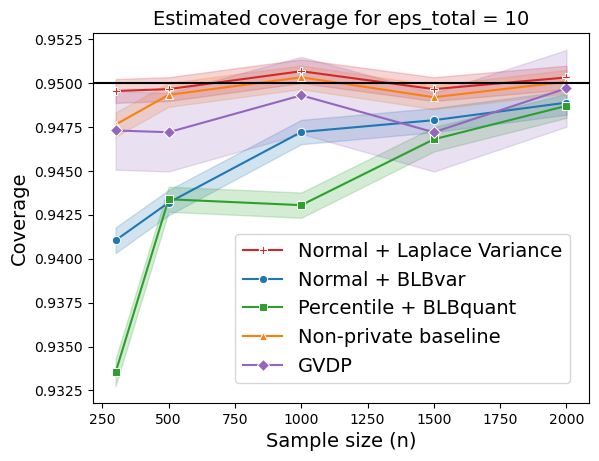

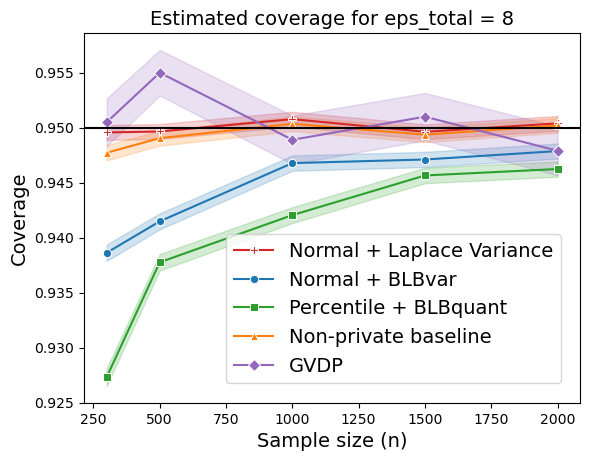

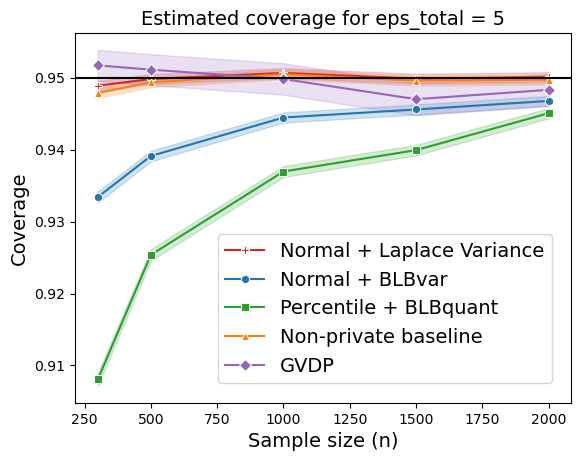

In [21]:
drop_cols_lst = ['eps_total','eps_param_frac',
                 ]

for eps_total in eps_total_lst:
    for eps_param_frac in eps_param_frac_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total) & (df_combined_all['eps_param_frac'] == eps_param_frac)]
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial', 'resamp'])

        # df_combined = pd.melt(df_combined,id_vars=["n","trial","resamp"]
        #                     ,var_name="method",value_name="coverage") #,'eps_param_frac',,"eps_total"
        # display(df_combined)
        if gvdp_res:
            df_gvdp_combined = df_gvdp_combined_all[df_gvdp_combined_all['eps_total'] == eps_total]
            df_gvdp_combined = df_gvdp_combined.drop(columns=['eps_total'])
            # df_gvdp_combined.rename({'gvdp': 'coverage'}, axis=1, inplace=True)
            # df_gvdp_combined['method'] = 'gvdp'
            # df_combined = pd.concat([df_combined,df_gvdp_combined])
        # display(df_combined)
        
        plt.figure()
        for alg in alg_lst:
            sns.lineplot(data=df_combined,
                        x="n",y=alg, #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = marker_dict[alg],errorbar='se',estimator="mean",
                        color= color_dict[alg],label=alg_name_dict[alg])
        if gvdp_res:
            sns.lineplot(data=df_gvdp_combined,
                        x="n",y='gvdp', #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = 'D',errorbar='se',estimator="mean",
                        color= 'tab:purple',label='GVDP')
        plt.legend(loc='best', borderaxespad=1, fontsize = legend_font_size)
        plt.xlabel("Sample size (n)", fontsize = legend_font_size)
        plt.ylabel("Coverage", fontsize = legend_font_size)
        plt.axhline(1 - alpha,color = 'k')
        
        plt.title(f"Estimated coverage for eps_total = {eps_total}", fontsize = legend_font_size)
        # plt.savefig(f'./figures/mean_est_covg_eps_{eps_total}.pdf')


# Widths

In [22]:
df_combined_all = pd.concat(df_list_len)

In [23]:
eps_total_lst = [10,8,5] #[2,5,10]
eps_param_frac_lst = [0.5] #[0.1,0.3,0.5]

In [24]:
df_combined_all

,n,trial,resamp,eps_total,eps_param_frac,normal_proper_blb,proper_unstud,boot_unstud_priv,normal_proper_adhoc
0,300,0,0,10,0.5,0.441333,0.413047,0.458319,0.441474
1,300,0,1,10,0.5,0.441333,0.413047,0.458319,0.441474
2,300,0,2,10,0.5,0.441333,0.413047,0.458319,0.441474
3,300,0,3,10,0.5,0.441333,0.413047,0.458319,0.441474
4,300,0,4,10,0.5,0.441333,0.413047,0.458319,0.441474
...,...,...,...,...,...,...,...,...,...
103995,2000,1039,95,5,0.5,0.160868,0.155075,0.159087,0.161941
103996,2000,1039,96,5,0.5,0.160868,0.155075,0.159087,0.161941
103997,2000,1039,97,5,0.5,0.160868,0.155075,0.159087,0.161941
103998,2000,1039,98,5,0.5,0.160868,0.155075,0.159087,0.161941


In [25]:
alg_lst = [
    "normal_proper_blb",
    # "normal_proper_subsamp_agg",
    "normal_proper_adhoc",
    # "improper_stud",
    # "proper_param_stud",
    # "proper_sigma_stud",
    # "improper_unstud",
    "proper_unstud",
    # "gvdp",
    "boot_unstud_priv",
    # "boot_stud",
]

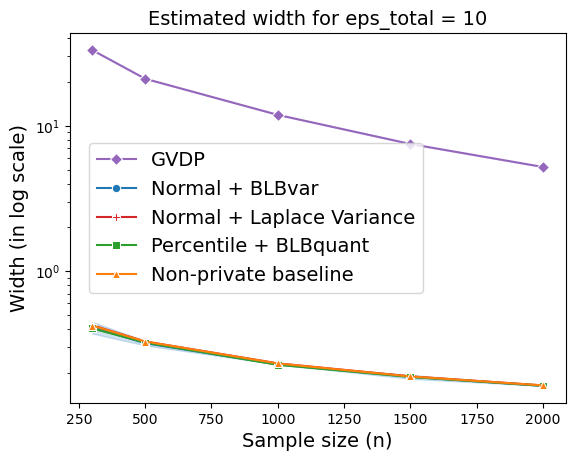

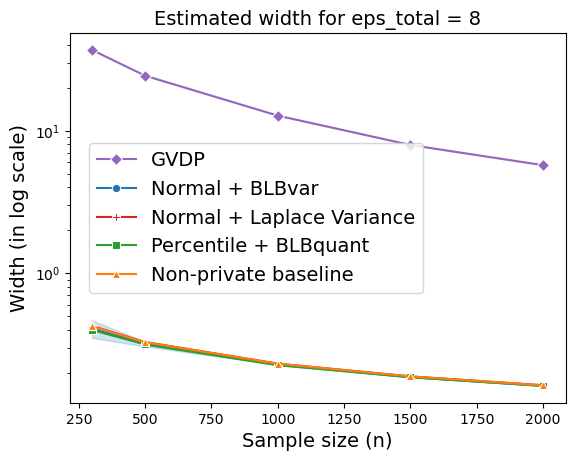

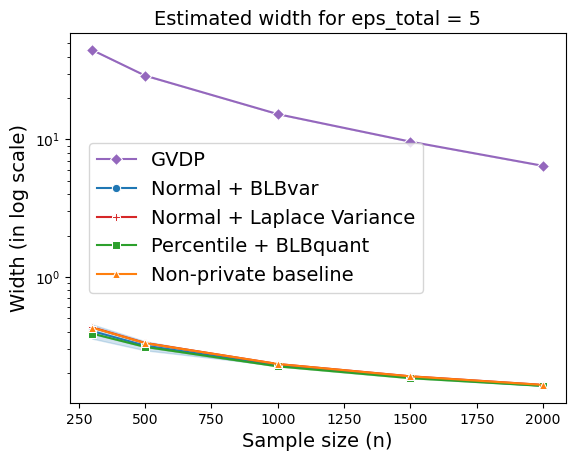

In [26]:
drop_cols_lst = ['eps_total','eps_param_frac', 'resamp',
                 ]
for eps_total in eps_total_lst:
    for eps_param_frac in eps_param_frac_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total) 
                                    & (df_combined_all['eps_param_frac'] == eps_param_frac)]
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial',
                                                #    'resamp',
                                                   ])
        if gvdp_res:
            df_gvdp_combined = df_gvdp_combined_all_len[(df_gvdp_combined_all_len['eps_total'] == eps_total)
                                                        # & (df_gvdp_combined_all_len['trial'] < 80)
                                                        ]
            df_gvdp_combined = df_gvdp_combined.drop(columns=['eps_total',])
            # df_gvdp_combined.rename({'gvdp': 'length'}, axis=1, inplace=True)
            # df_gvdp_combined['method'] = 'gvdp'
            # display(df_gvdp_combined)
            # df_combined = pd.concat([df_combined,df_gvdp_combined])
        # display(df_combined)
        # for alg in alg_lst:
        #     df_combined[alg] = df_combined[alg]/df_combined['boot_unstud_priv']
        # df_combined = df_combined.drop(columns=['boot_unstud_priv'])
        # display(df_combined)
        # df_combined = pd.melt(df_combined,id_vars=["n","trial",
        #                                         #    "resamp"
        #                                            ]
        #                     ,var_name="method",value_name="length") #,'eps_param_frac',,"eps_total"
        # display(df_combined)
        plt.figure()
        if gvdp_res:
            df_gvdp_combined.reset_index(inplace=True)
            sns.lineplot(data=df_gvdp_combined,
                        x="n",y='gvdp', 
                        marker = 'D',errorbar='se',estimator="mean",
                        color= 'tab:purple',label='GVDP')
        
        
        for alg in alg_lst:
            sns.lineplot(data=df_combined,
                        x="n",y=alg, #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = marker_dict[alg],errorbar='se',estimator="median",
                        color= color_dict[alg],label=alg_name_dict[alg])
        plt.legend(loc='best', borderaxespad=1, fontsize = legend_font_size)
        plt.xlabel("Sample size (n)", fontsize = legend_font_size)
        plt.ylabel("Width (in log scale)", fontsize = legend_font_size)
        plt.yscale('log')
        
        plt.title(f"Estimated width for eps_total = {eps_total}", fontsize = legend_font_size)
        # plt.savefig(f'./figures/mean_est_len_eps_{eps_total}.pdf')
        

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


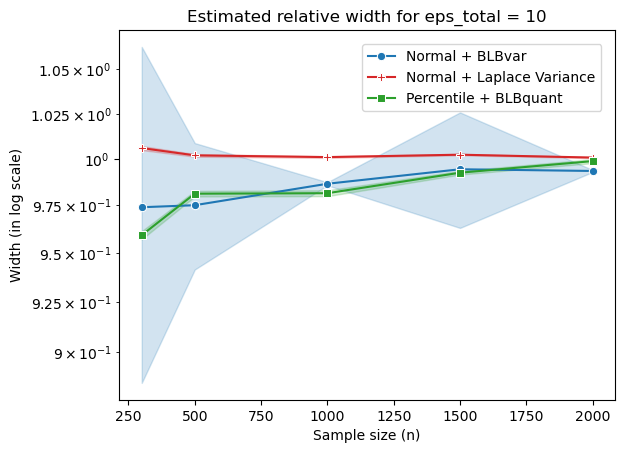

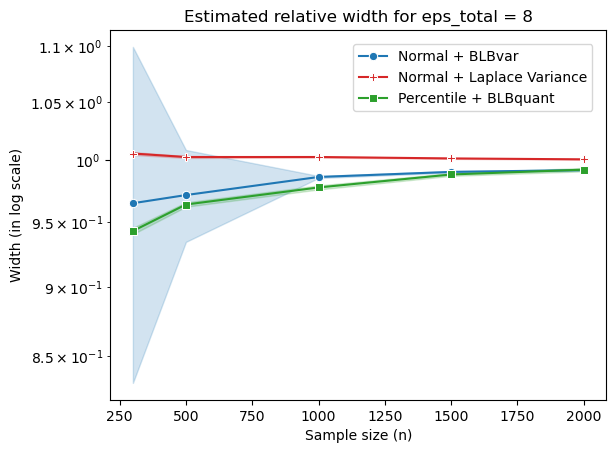

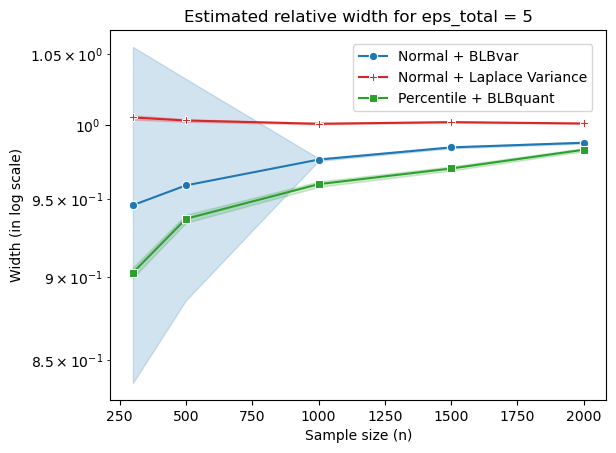

In [28]:
drop_cols_lst = [
    # 'dist',
    'eps_total','eps_param_frac', 'resamp',
                #  'set_type',
                 ]
alg_lst_rel = alg_lst.copy()
alg_lst_rel.remove('boot_unstud_priv')
for eps_total in eps_total_lst:
    for eps_param_frac in eps_param_frac_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total) 
                                    & (df_combined_all['eps_param_frac'] == eps_param_frac)]
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial',
                                                #    'resamp',
                                                   ])
        # display(df_combined)
        for alg in alg_lst:
            df_combined[alg] = df_combined[alg]/df_combined['boot_unstud_priv']
        df_combined = df_combined.drop(columns=['boot_unstud_priv'])
        # display(df_combined)
        # df_combined = pd.melt(df_combined,id_vars=["n","trial",
        #                                         #    "resamp"
        #                                            ]
        #                     ,var_name="method",value_name="length") #,'eps_param_frac',,"eps_total"
        # display(df_combined)
        plt.figure()
        
        for alg in alg_lst_rel:
            sns.lineplot(data=df_combined,
                        x="n",y=alg, #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = marker_dict[alg],errorbar='se',estimator="median",
                        color= color_dict[alg],label=alg_name_dict[alg])
        plt.legend(loc='best', borderaxespad=1)
        plt.xlabel("Sample size (n)")
        plt.ylabel("Width (in log scale)")
        plt.yscale('log')
        
        plt.title(f"Estimated relative width for eps_total = {eps_total}")
        # plt.savefig(f'./figures/mean_est_rel_len_eps_{eps_total}.pdf')
        

## Width histograms

In [29]:
alg_lst = [
    "normal_proper_blb",
    # "normal_proper_subsamp_agg",
    "normal_proper_adhoc",
    # "improper_stud",
    # "proper_param_stud",
    # "proper_sigma_stud",
    # "improper_unstud",
    "proper_unstud",
    # "gvdp",
    "boot_unstud_priv",
    # "boot_stud",
]

In [46]:
n_val = 1000
gvdp_res = False
eps_total_lst = [10,8,5] #[2,5,10]

In [47]:
np.min(df_combined_all[df_combined_all['n'] == 2000]['proper_unstud'])

0.005713301825398641

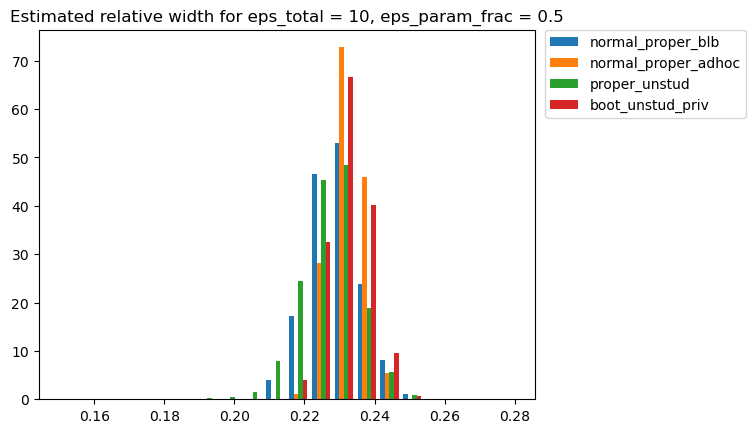

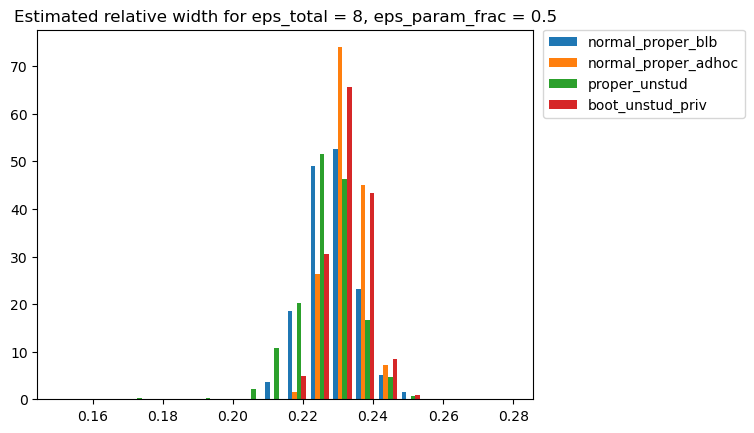

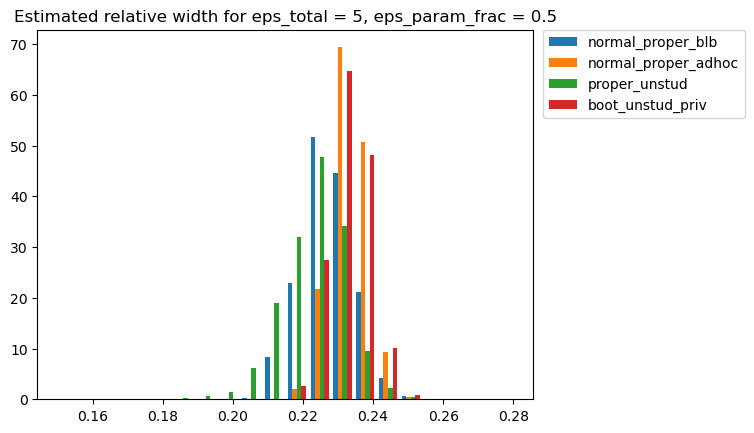

In [49]:
drop_cols_lst = [
                # 'dist',
                 'eps_total','eps_param_frac', 'resamp',
                #  'set_type',
                 ]
for eps_total in eps_total_lst:
    for eps_param_frac in eps_param_frac_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total) 
                                    & (df_combined_all['eps_param_frac'] == eps_param_frac)
                                    & (df_combined_all['n'] == n_val)
                                    ]
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial',
                                                #    'resamp',
                                                   ])
        if gvdp_res:
            df_gvdp_combined = df_gvdp_combined_all_len[(df_gvdp_combined_all_len['eps_total'] == eps_total)
                                                        & (df_gvdp_combined_all_len['trial'] < 80)
                                                        ]
            df_gvdp_combined = df_gvdp_combined.drop(columns=['eps_total','resamp'])
            # df_gvdp_combined.rename({'gvdp': 'length'}, axis=1, inplace=True)
            # df_gvdp_combined['method'] = 'gvdp'
            # display(df_gvdp_combined)
            # df_combined = pd.concat([df_combined,df_gvdp_combined])
        
        hist_plot = []
        for alg in alg_lst:
            hist_plot.append(df_combined[alg])
        if gvdp_res:
            hist_plot.append(df_gvdp_combined['gvdp'])
            label_lst = alg_lst + ['gvdp']
        else:
            label_lst = alg_lst
        # df_combined = df_combined.drop(columns=['boot_unstud_priv'])
        # display(df_combined)
        # df_combined = pd.melt(df_combined,id_vars=["n","trial",
        #                                         #    "resamp"
        #                                            ]
        #                     ,var_name="method",value_name="length") #,'eps_param_frac',,"eps_total"
        # # display(df_combined)

        plt.figure()
        hist, bins, _ = plt.hist(hist_plot, label=label_lst, bins = 20,
                #  cumulative=True,
                range=[0.15,0.28],
                 density=True)
        
        # histogram on log scale. 
        # Use non-equal bin sizes, such that they look equal on log scale.
        # plt.figure()
        # logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
        # plt.hist(hist_plot, label=label_lst, bins = logbins,
        #          cumulative=True,
        #          density=True)
        # sns.lineplot(data=df_combined,
        #             x="n",y="length",hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
        #             marker = 'o',errorbar='se',estimator="mean")
        # plt.xscale('log')
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.title(f"Estimated relative width for eps_total = {eps_total}, eps_param_frac = {eps_param_frac}")


In [32]:
eps_total_lst = [8]
for eps_total in eps_total_lst:
    for eps_param_frac in eps_param_frac_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total) 
                                    & (df_combined_all['eps_param_frac'] == eps_param_frac)
                                    & (df_combined_all['n'] == 300)
        ]
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial',
                                                #    'resamp',
                                                   ])
        
        hist_plot = []
        for alg in alg_lst:
            hist_plot.append(df_combined[alg])

In [33]:
far_range = [17,20]
near_range = [0.25,0.5]

In [34]:
alg_lst = ['normal_proper_blb','normal_proper_adhoc','proper_unstud','boot_unstud_priv']
alg_name_list = ['Normal + BLBvar',
                 'Normal + Laplace Variance',
                 'Percentile + BLBquant',
                 'Non-private baseline',]
marker_dict = {'normal_proper_blb':'o',
               'boot_unstud_priv':'^',
               'proper_unstud':'s',
               'normal_proper_adhoc':'P'}
color_list = [
              'tab:blue',
              'tab:red',
              'tab:green',
              'tab:orange',
              ]

/scratch/knchadha/miniconda3/envs/dp-inference/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


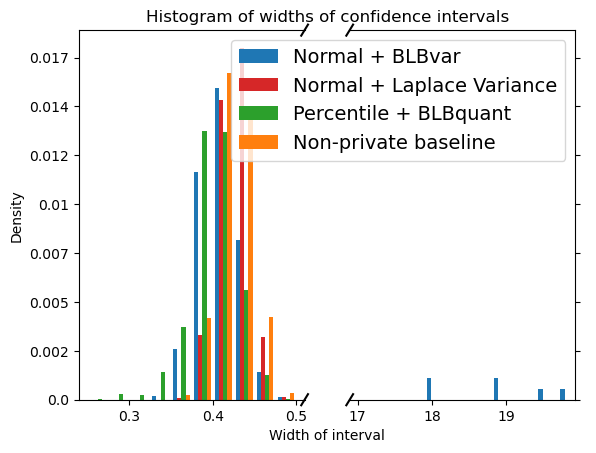

In [35]:
fig, axs = plt.subplots(1, 2, sharey=True)

# Plot histogram from 0 to 1
axs[1].hist(hist_plot, bins=10, range=far_range, label=alg_name_list, color= color_list, density=True)
axs[0].hist(hist_plot, bins=10, range=near_range,label=alg_name_list, color= color_list, density=True)
plt.legend(fontsize = 20)
# Plot histogram from 25 to 30

# Hide the spines between ax and ax2
axs[0].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
# axs[0].xaxis.tick_top()
# axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
# axs[1].xaxis.tick_bottom()

locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(hist_plot[0]),3))
axs[1].yaxis.tick_right()
plt.legend(fontsize = legend_font_size)

d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False)
axs[0].plot((1-d, 1+d), (1-d, 1+d), **kwargs)        # top-left diagonal
axs[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axs[1].transAxes)  # switch to the bottom axes
axs[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axs[1].plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

axs[0].set(ylabel='Density')
plt.xlabel('Width of interval')
axs[1].label_outer()
plt.title('Histogram of widths of confidence intervals')
plt.savefig('./figures/mean_est_joint_hist.pdf', bbox_inches='tight')
plt.show()